<a href="https://colab.research.google.com/github/pingping-0606/Python_dataviz2024/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW9 present radar chart data india

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_to_movie = '/content/drive/MyDrive/data_viz_2024/IMDb Movies India.csv'

In [7]:
data_india = pd.read_csv(path_to_movie, encoding='latin-1')
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#ตรวจสอบค่า null
data_india.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [9]:
data_india = data_india.dropna(subset=['Rating', 'Votes','Duration','Genre','Actor 1','Actor 2'])

In [10]:
data_india['Year'] =data_india['Year'].str.replace('(', '').str.replace(')', '').astype(int)
data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)
data_india['Votes'] = data_india['Votes'].str.replace(',', '')

<ipython-input-10-d4b5746bc2e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['Year'] =data_india['Year'].str.replace('(', '').str.replace(')', '').astype(int)
<ipython-input-10-d4b5746bc2e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)
<ipython-input-10-d4b5746bc2e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [11]:
# ตรวจสอบและแปลงคอลัมน์ Votes เป็น float
data_india['Votes'] = pd.to_numeric(data_india['Votes'], errors='coerce')

<ipython-input-11-19497a595d1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['Votes'] = pd.to_numeric(data_india['Votes'], errors='coerce')


In [12]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [16]:
#หลังdropnaแล้วข้อมูลเหลือกี่%จากเดิม

print(f"ข้อมูลเหลือ {(len(data_india) / len(pd.read_csv('/content/drive/MyDrive/data_viz_2024/IMDb Movies India.csv', encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 36.79% จากเดิม


In [17]:
data_india.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,46


In [18]:
# prompt: split value in column genre by ',' and make more column for each of those

import pandas as pd
# Split the 'Genre' column by ',' and create new columns
genre_split = data_india['Genre'].str.split(',', expand=True)

# Rename the new columns
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genre_split], axis=1)

# Display the updated DataFrame
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


In [19]:
# prompt: delete space in the value in Genre1 Genre2 Genre3

for col in ['Genre1', 'Genre2', 'Genre3']:
  data_india[col] = data_india[col].str.strip() if data_india[col].dtype == 'object' else data_india[col]


In [20]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama,None,None
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography,Drama,History
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,Crime,Drama
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,None


In [21]:
# prompt: เลือกผู้กำกับที่มี Rating และ Votes มากกว่า 75%
# top_directors = movie_df[(movie_df['Rating'] >= rating_q3) & (movie_df['Votes'] >= tes_q3)]['Director'].value_counts()
#และ คิดเกณฑ์คะแนนถ่วงน้ำหนัก Votes และ rating ให้ rating 60% และ Votes 40% ถ่วงให้ไม่เกิน 100%
# Calculate the 75th percentile for Rating and Votes
rating_q3 = data_india['Rating'].quantile(0.75)
tes_q3 = data_india['Votes'].quantile(0.75)

# Filter the DataFrame to include only directors with Rating and Votes above the 75th percentile
top_directors = data_india[(data_india['Rating'] >= rating_q3) & (data_india['Votes'] >= tes_q3)]['Director'].value_counts()
top_directors

,count
Director,
Yash Chopra,11
Ram Gopal Varma,10
Hrishikesh Mukherjee,10
Anurag Kashyap,10
Nagesh Kukunoor,8
...,...
Shubhashish Bhutiani,1
Leslee Udwin,1
Abhay Chopra,1


In [22]:
data_india[data_india['Director'] == 'Hrishikesh Mukherjee']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
479,Aashiq,1962,150,Romance,6.7,64,Hrishikesh Mukherjee,Raj Kapoor,Padmini,Nanda,Romance,None,None
487,Aashirwad,1968,146,Drama,7.3,203,Hrishikesh Mukherjee,Ashok Kumar,Sanjeev Kumar,Sumita Sanyal,Drama,None,None
563,Abhimaan,1973,122,"Drama, Musical",7.9,2665,Hrishikesh Mukherjee,Amitabh Bachchan,Jaya Bachchan,Asrani,Drama,Musical,None
806,Alaap,1977,160,"Drama, Musical",6.7,327,Hrishikesh Mukherjee,Amitabh Bachchan,Rekha,Chhayadevi,Drama,Musical,None
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal,Drama,Musical,None
993,Anari,1959,166,"Comedy, Drama, Musical",7.9,740,Hrishikesh Mukherjee,Raj Kapoor,Nutan,Lalita Pawar,Comedy,Drama,Musical
1174,Anupama,1966,148,"Drama, Romance",7.4,416,Hrishikesh Mukherjee,Dharmendra,Sharmila Tagore,Shashikala,Drama,Romance,None
1177,Anuradha,1960,141,"Drama, Romance",6.6,196,Hrishikesh Mukherjee,Balraj Sahni,Leela Naidu,Abhi Bhattacharya,Drama,Romance,None
1325,Asli-Naqli,1962,145,"Drama, Musical, Romance",7.5,257,Hrishikesh Mukherjee,Dev Anand,Sadhana,Nasir Hussain,Drama,Musical,Romance
1927,Bawarchi,1972,130,"Comedy, Musical, Drama",8.0,3793,Hrishikesh Mukherjee,Rajesh Khanna,Jaya Bachchan,Usha Kiran,Comedy,Musical,Drama


In [23]:
# prompt: ดึงข้อมูลของ Yash Chopra, Ram Gopal Varma, Hrishikesh Mukherjee, Anurag Kashyap, Nagesh Kukunoor มาเป็นdataframeใหม่

directors_to_extract = ['Yash Chopra', 'Ram Gopal Varma', 'Hrishikesh Mukherjee', 'Anurag Kashyap', 'Nagesh Kukunoor']
top = data_india[data_india['Director'].isin(directors_to_extract)].copy()
top


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
22,12 O'Clock,2021,105,"Horror, Thriller",4.4,63,Ram Gopal Varma,Mithun Chakraborty,Makrand Deshpande,Dalip Tahil,Horror,Thriller,None
73,3 Deewarein,2003,115,"Crime, Drama",7.8,2322,Nagesh Kukunoor,Naseeruddin Shah,Jackie Shroff,Juhi Chawla,Crime,Drama,None
125,8 x 10 Tasveer,2009,122,"Action, Fantasy, Mystery",5.4,5459,Nagesh Kukunoor,Akshay Kumar,Ayesha Takia,Javed Jaffrey,Action,Fantasy,Mystery
216,Aadmi Aur Insaan,1969,168,"Drama, Romance, Thriller",6.2,149,Yash Chopra,Dharmendra,Saira Banu,Feroz Khan,Drama,Romance,Thriller
475,Aashayein,2010,120,Drama,7.1,1259,Nagesh Kukunoor,John Abraham,Anaitha Nair,Girish Karnad,Drama,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14582,Ugly,2013,128,"Crime, Drama, Mystery",8.0,20709,Anurag Kashyap,Rahul Bhatt,Ronit Roy,Tejaswini Kolhapure,Crime,Drama,Mystery
14816,Veerappan,2016,125,"Action, Biography, Crime",5.3,711,Ram Gopal Varma,Sachiin Joshi,Sandeep Bharadwaj,Usha Jadhav,Action,Biography,Crime
14826,Veer-Zaara,2004,192,"Drama, Family, Musical",7.8,50101,Yash Chopra,Shah Rukh Khan,Preity Zinta,Rani Mukerji,Drama,Family,Musical
14864,Vijay,1988,172,"Action, Drama, Romance",5.6,219,Yash Chopra,Anil Kapoor,Rajesh Khanna,Rishi Kapoor,Action,Drama,Romance


In [24]:
# prompt: Using dataframe top: สร้าง bar  นับจำนวน Genre1  Genre2  Genre3 ของ director ใช้ px

import plotly.express as px

# Group by director and count the number of each genre
genre_counts = top.groupby(['Director', 'Genre1'])['Name'].count().reset_index(name='Count')
genre_counts2 = top.groupby(['Director', 'Genre2'])['Name'].count().reset_index(name='Count')
genre_counts3 = top.groupby(['Director', 'Genre3'])['Name'].count().reset_index(name='Count')

# Create a bar chart using Plotly Express
fig = px.bar(genre_counts, x='Director', y='Count', color='Genre1', barmode='group', title='Genre1 Count by Director')
fig.show()

fig2 = px.bar(genre_counts2, x='Director', y='Count', color='Genre2', barmode='group', title='Genre2 Count by Director')
fig2.show()

fig3 = px.bar(genre_counts3, x='Director', y='Count', color='Genre3', barmode='group', title='Genre3 Count by Director')
fig3.show()



In [25]:
# prompt: Using dataframe top: plot radar chart count 'Name' that 'Director' own

# Assuming you want to plot a radar chart showing the count of movies directed by each director.
import plotly.express as px

# Group by 'Director' and count the number of movies directed by each.
director_counts = top.groupby('Director')['Name'].count().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_counts, r='Name', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()



In [26]:
director_votes = top.groupby('Director')['Votes'].mean().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_votes, r='Votes', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [27]:
director_Rating = top.groupby('Director')['Rating'].mean().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_Rating, r='Rating', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [28]:
director_Duration = top.groupby('Director')['Duration'].mean().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_Duration, r='Duration', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [29]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama,None,None
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography,Drama,History
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,Crime,Drama
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,None


In [30]:
data_india[data_india['Director'] == 'Saif Ali Sayeed']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,Drama,Romance,None


In [31]:
allgenre = list(top['Genre1'])+list(top['Genre2'])+list(top['Genre3'])
allgenre

['Horror',
 'Crime',
 'Action',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Musical',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Action',
 'Action',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Drama',
 'Crime',
 'Comedy',
 'Comedy',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Action',
 'Drama',
 'Action',
 'Drama',
 'Mystery',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Action',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Crime',
 'Crime',
 'Action',
 'Romance',
 'Drama',
 'Crime',
 'Comedy',
 'Horror',
 'Comedy',
 'Action',
 'Action',
 'Action',
 'Comedy',
 'Comedy',
 'Drama',
 'Animation',
 'Co

In [32]:
# prompt: allgenreที่ไม่ซ้ำ

unique_genres = list(set([genre for genre in allgenre if genre is not None]))
print(unique_genres)


['Horror', 'Fantasy', 'Family', 'Adventure', 'Biography', 'Music', 'Musical', 'Mystery', 'Animation', 'Sport', 'Action', 'Drama', 'Comedy', 'Crime', 'History', 'Romance', 'Thriller']


In [39]:
#.unq

In [34]:
len(set(allgenre))

18

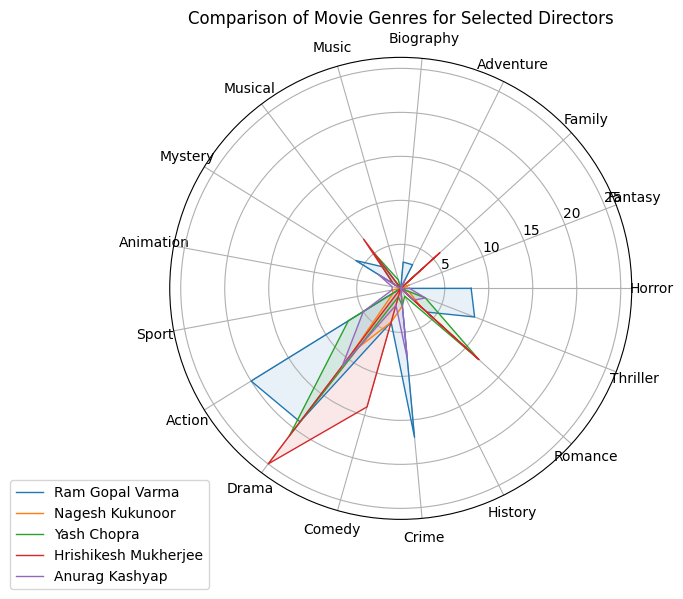

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi



df = pd.DataFrame(top)

# รายการแนวหนังที่ต้องการพิจารณา
unique_genres = list(set([genre for genre in allgenre if genre is not None]))
# คำนวณจำนวนหนังในแต่ละ Genre ที่ผู้กำกับแต่ละคนทำ
director_genre_count = {director: {genre: 0 for genre in unique_genres} for director in df['Director'].unique()}

# นับจำนวนหนังของผู้กำกับแต่ละคนในแต่ละ Genre
for _, row in df.iterrows():
    movie_genres = {row['Genre1'], row['Genre2'], row['Genre3']}
    movie_genres = {g for g in movie_genres if g != ''}  # เอา genre ที่ไม่ว่าง

    director = row['Director']
    for genre in movie_genres:
        if genre in director_genre_count[director]:
            director_genre_count[director][genre] += 1

# เลือกผู้กำกับที่ต้องการเปรียบเทียบ (ตัวอย่าง Director A และ Director B)
#selected_directors = ['Director A', 'Director B'] #This line caused the error
selected_directors = df['Director'].unique()[:5] # Select the first two directors from your dataframe instead

# เตรียมข้อมูลสำหรับ Radar Chart
categories = unique_genres
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # ทำให้กราฟปิดวงกลม

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for director in selected_directors:
    values = list(director_genre_count[director].values())
    values += values[:1]  # ทำให้กราฟปิดวงกลม

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=director)
    ax.fill(angles, values, alpha=0.1)

# ตั้งค่าแกนและชื่อของแต่ละ Genre
plt.xticks(angles[:-1], categories)

# เพิ่มชื่อเรื่องและแสดงผลลัพธ์
plt.title('Comparison of Movie Genres for Selected Directors')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

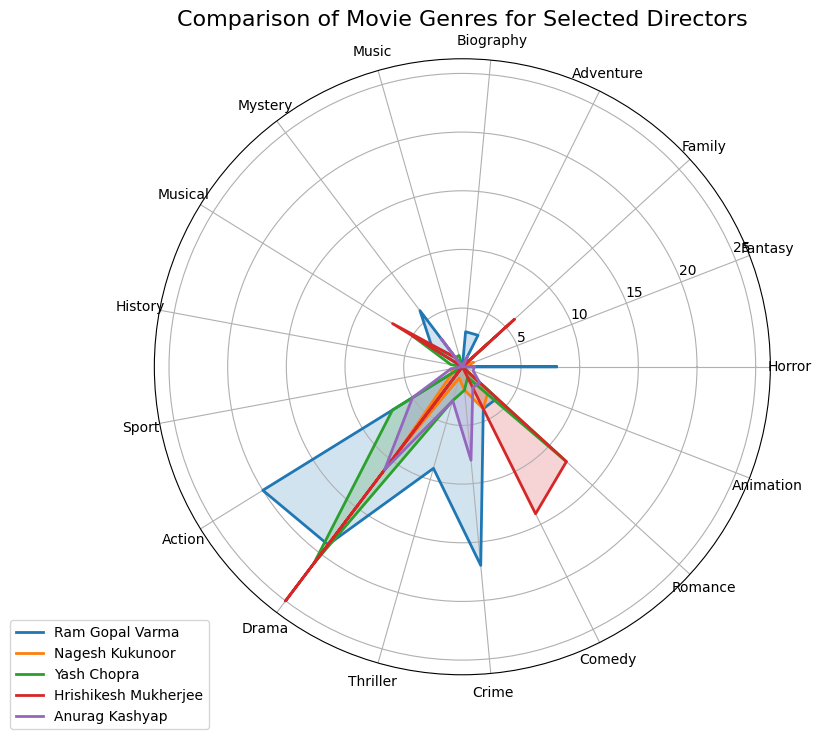

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# ตัวอย่างการอ่านข้อมูลจากไฟล์ CSV (ถ้ามีการโหลดข้อมูลจากไฟล์อื่น)
# df = pd.read_csv('your_data.csv')

# สำหรับไฟล์ที่คุณให้มา สามารถอ่านข้อมูลนี้แทนได้:
df = pd.DataFrame(top)  # นำข้อมูลจาก 'top' ที่คุณมีอยู่แล้ว

# รายการแนวหนังที่ต้องการพิจารณา
allgenre = df[['Genre1', 'Genre2', 'Genre3']].values.flatten().tolist()
unique_genres = list(set([genre for genre in allgenre if genre != '' and genre is not None]))

# คำนวณจำนวนหนังในแต่ละ Genre ที่ผู้กำกับแต่ละคนทำ
director_genre_count = {director: {genre: 0 for genre in unique_genres} for director in df['Director'].unique()}

# นับจำนวนหนังของผู้กำกับแต่ละคนในแต่ละ Genre
for _, row in df.iterrows():
    movie_genres = {row['Genre1'], row['Genre2'], row['Genre3']}
    movie_genres = {g for g in movie_genres if g != ''}  # เอา genre ที่ไม่ว่าง

    director = row['Director']
    for genre in movie_genres:
        if genre in director_genre_count[director]:
            director_genre_count[director][genre] += 1

# เลือกผู้กำกับที่ต้องการเปรียบเทียบ (ตัวอย่างใช้ 5 คนแรก)
selected_directors = df['Director'].unique()[:5]

# เตรียมข้อมูลสำหรับ Radar Chart
categories = unique_genres
N = len(categories)

# สร้างมุมสำหรับการวาด Radar Chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # ทำให้กราฟปิดวงกลม

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop เพื่อเพิ่มเส้นและพื้นที่สำหรับผู้กำกับแต่ละคน
for director in selected_directors:
    values = list(director_genre_count[director].values())
    values += values[:1]  # ทำให้กราฟปิดวงกลม

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=director)
    ax.fill(angles, values, alpha=0.2)

# ตั้งค่าแกนและชื่อของแต่ละ Genre
plt.xticks(angles[:-1], categories)

# เพิ่มชื่อเรื่องและแสดงผลลัพธ์
plt.title('Comparison of Movie Genres for Selected Directors', size=16, color='black')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# แสดงกราฟ
plt.show()


In [37]:
import pandas as pd
import plotly.graph_objects as go

# เตรียมข้อมูล
df = pd.DataFrame(top)

# รายการแนวหนังที่ต้องการพิจารณา
allgenre = df[['Genre1', 'Genre2', 'Genre3']].values.flatten().tolist()
unique_genres = list(set([genre for genre in allgenre if genre != '' and genre is not None]))

# คำนวณจำนวนหนังในแต่ละ Genre ที่ผู้กำกับแต่ละคนทำ
director_genre_count = {director: {genre: 0 for genre in unique_genres} for director in df['Director'].unique()}

# นับจำนวนหนังของผู้กำกับแต่ละคนในแต่ละ Genre
for _, row in df.iterrows():
    movie_genres = {row['Genre1'], row['Genre2'], row['Genre3']}
    movie_genres = {g for g in movie_genres if g != ''}  # เอา genre ที่ไม่ว่าง

    director = row['Director']
    for genre in movie_genres:
        if genre in director_genre_count[director]:
            director_genre_count[director][genre] += 1

# เลือกผู้กำกับที่ต้องการเปรียบเทียบ
selected_directors = df['Director'].unique()[:5]

# เตรียมข้อมูลสำหรับ Radar Chart
categories = unique_genres

# สร้างกราฟ Radar แบบโต้ตอบ
fig = go.Figure()

for director in selected_directors:
    values = list(director_genre_count[director].values())
    values += values[:1]  # ทำให้กราฟปิดวงกลม

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],  # เพื่อปิดกราฟ
        fill='toself',
        name=director
    ))

# ตั้งค่า layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(max(director_genre_count[director].values()) for director in selected_directors)])
    ),
    title="Comparison of Movie Genres for Selected Directors",
    showlegend=True
)

# แสดงกราฟ
fig.show()
